# Regresija

---

__Regresija__ je provlačenje funkcije $f$ koja ovisi o $n$ parametara kroz točke $(x_i,y_i)$, $i=1,2,\ldots, m$, pri čemu je $m>n$, tako da se __minimizira norma odstupanja__:

$$
\| f(x_i)-y_i\|_{1,2,\infty}\to \min.
$$

Regresija u __smislu najmanjih kvadrata__ je

$$
\| f(x_i)-y_i\|_{2}\to \min.
$$

Kada je funkcija $f$ pravac,

$$ 
f(x)=kx+l,
$$

radi se o __linearnoj regresiji__. U tom slučaju dobije se linearnih jednadžbi

$$
k x_i + l=y_i, \quad i=1,2,\ldots,m.
$$

Ukoliko sve točke __ne leže na istom pravcu__, sustav nije rješiv pa se računa kvadratična prilagodba.

## Primjer

Provucimo pravac kroz točke $(x_i,y_i)$, $i=1,\ldots,m$, i izračunajmo kvalitetu prilagodbe. 

In [1]:
n=5
x=collect([1,2,4,6,7])
y=collect([1,3,2,4,3])
A=[x ones(5)]
kl=A\y

2-element Array{Float64,1}:
 0.307692
 1.36923 

In [2]:
# Nacrtajmo točke i pravac
using Winston

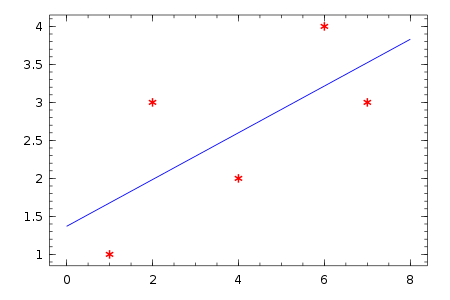

In [3]:
xx=linspace(0,8,100)
yy=kl[1]*xx+kl[2]
plot(x,y,"r*",xx,yy,"b")

In [4]:
# Izračunajmo kvalitetu prilagodbe
q=sqrt(norm(A*kl-y)/norm(y))

0.5147667768205638

## Primjer - Kvadratična regresija

Kroz točke možemo provući i kvadratni polinom $y=ax^2+bx+c$. Ukoliko sve točke ne leže na istoj paraboli, sustav linearnih jednadžbi 

$$
ax_i^2+bx_i+c=y_i, \quad i=1,\ldots,m,
$$

nije rješiv pa računamo kvadratičnu prilagodbu. 

In [5]:
n=5
x=collect([1,2,4,5,6])
y=collect([0,1,4,8,14])
A=[x.^2 x ones(n)]
abc=A\y


(process:2715): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed


3-element Array{Float64,1}:
  0.689935
 -2.16071 
  1.86364 

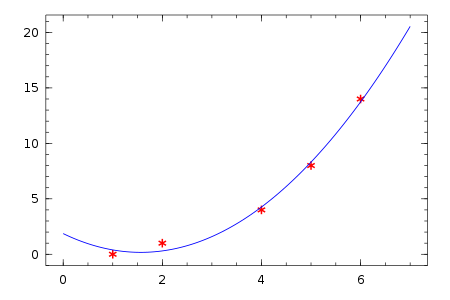

In [6]:
# Nacrtajmo točke i parabolu
xx=linspace(0,7,100)
yy=abc[1]*xx.^2+abc[2].*xx+abc[3]
plot(x,y,"r*",xx,yy,"b")

In [7]:
# Izračunajmo kvalitetu prilagodbe
q=sqrt(norm(A*abc-y)/norm(y))

0.23696295042459756

## Primjer - Rast svjetske populacije

Dosadašnji rast populacije (u milionima) da je u sljedećoj tablici (vidi http://en.wikipedia.org/wiki/World_population). 

godina | 1750 | 1800 | 1850 | 1900 | 1950 | 1999 | 2008 | 2010 | 2012
---| ---: | --: | ---: | ---: | ---: | ---: | ---: | ---: | ---: | ---: |
populacija | 791 | 978 | 1262 | 1650 | 2521 | 5978 | 6707 | 6896 | 7052

Aproksimirajmo rast populacije eksponencijalnom funkcijom 

$$
P(t)=Ce^{kt}
$$

i predvidimo populaciju 2050. godine.

Sustav jednadžbi 

$$
Ce^{kt_i}=P_i, \quad i=1,2,\ldots, 9
$$

logaritmiranjem prelazi u sustav linearnih jednadžbi

$$
k \,t_i + \ln C =\ln P_i.
$$

Sve točke ne leže na istoj krivulji pa sustav nije rješiv i računamo kvadratičnu prilagodbu.

In [8]:
n=9
t=collect([1750,1800,1850,1900,1950,1999,2008,2010,2012])
P=collect([791,978,1262,1650,2521,5978,6707,6896,7052])
A= [t ones(9)]
kC=A\log(P)

2-element Array{Float64,1}:
  0.00883442
 -9.05591   

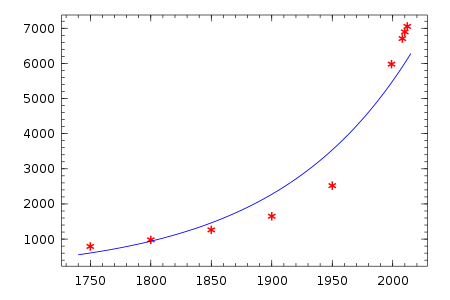

In [9]:
# Nacrtajmo točke i krivulju
tt=linspace(1740,2015,200)
PP=exp(kC[2]).*exp(kC[1].*tt)
plot(t,P,"r*",tt,PP,"b")

In [10]:
# predvidimo populaciju 2050
P2050=exp(kC[2])*exp(kC[1]*2050)

8558.212502172595

Izračunata predikcija je manja od one u tablici. Ako se ograničimo na razdoblje od 1950 godine imamo:

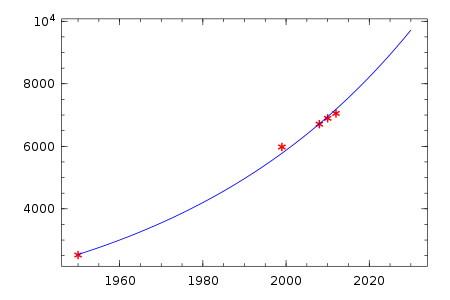

In [11]:
A= [t[5:end] ones(5)]
kC=A\log(P[5:end])
tt=linspace(1950,2030,200)
PP=exp(kC[2]).*exp(kC[1].*tt)
plot(t[5:end],P[5:end],"r*",tt,PP,"b")

In [12]:
P2050=exp(kC[2])*exp(kC[1]*2050)

13592.0770645014